In [ ]:
import polars as pl
import pandas as pd

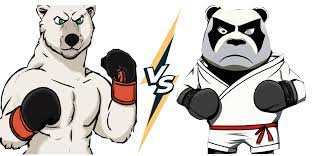

[Polars documentation](https://www.pola.rs/)

**Polars Features:**

- Lazy & eager computation
- Rust implementation
- Arrow memory layout
- Easy and transparent parallelisation using multithreading
- PySpark-like syntax and thus heavily inspired by SQL
- Supports real NA values in contrast to Pandas
- Easily deal with complex data types, e.g. list of strings/floats
- Copy-On-Write (COW) semantics in contrast to Pandas where you kind of never know


**Pandas Features:**

- De facto standard data wrangling library for Python
- Multi-index for rows and columns
- Quite unrestricted in what's possible, e.g. everything hashable can be a column name like integers, floats, enums
- Tons of functionality
- No parallelization
- Built on top of Numpy

### Чтение данных

In [ ]:
%%timeit

df_pd = pd.read_csv("titanic.csv")

3.63 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit

df_pl = pl.read_csv("titanic.csv")

1.14 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df_pd = pd.read_csv("titanic.csv")
df_pl = pl.read_csv("titanic.csv")

### Сохранение

In [ ]:
%%timeit

df_pd.to_csv("dataset_pandas.csv")

5.7 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit

df_pl.write_csv("dataset_polars.csv")

978 µs ± 231 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Выбор столбцов

In [ ]:
%%timeit

df_pd[["Name", "Cabin"]]

342 µs ± 7.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit

df_pl[["Name", "Cabin"]]

15.6 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Фильтрация

In [ ]:
%%timeit

df_pd[df_pd['Age'] > 20]

355 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit

df_pl.filter(pl.col('Age') > 20)

564 µs ± 87.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Группировка

In [ ]:
%%timeit

df_pd.groupby("Pclass")['Age'].mean().reset_index()

710 µs ± 9.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit

df_pl.group_by("Pclass").agg(pl.col("Age").mean())

267 µs ± 9.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Сортировка

In [ ]:
%%timeit

df_pd.sort_values("Fare")

400 µs ± 86.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit

df_pl.sort("Fare")

326 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


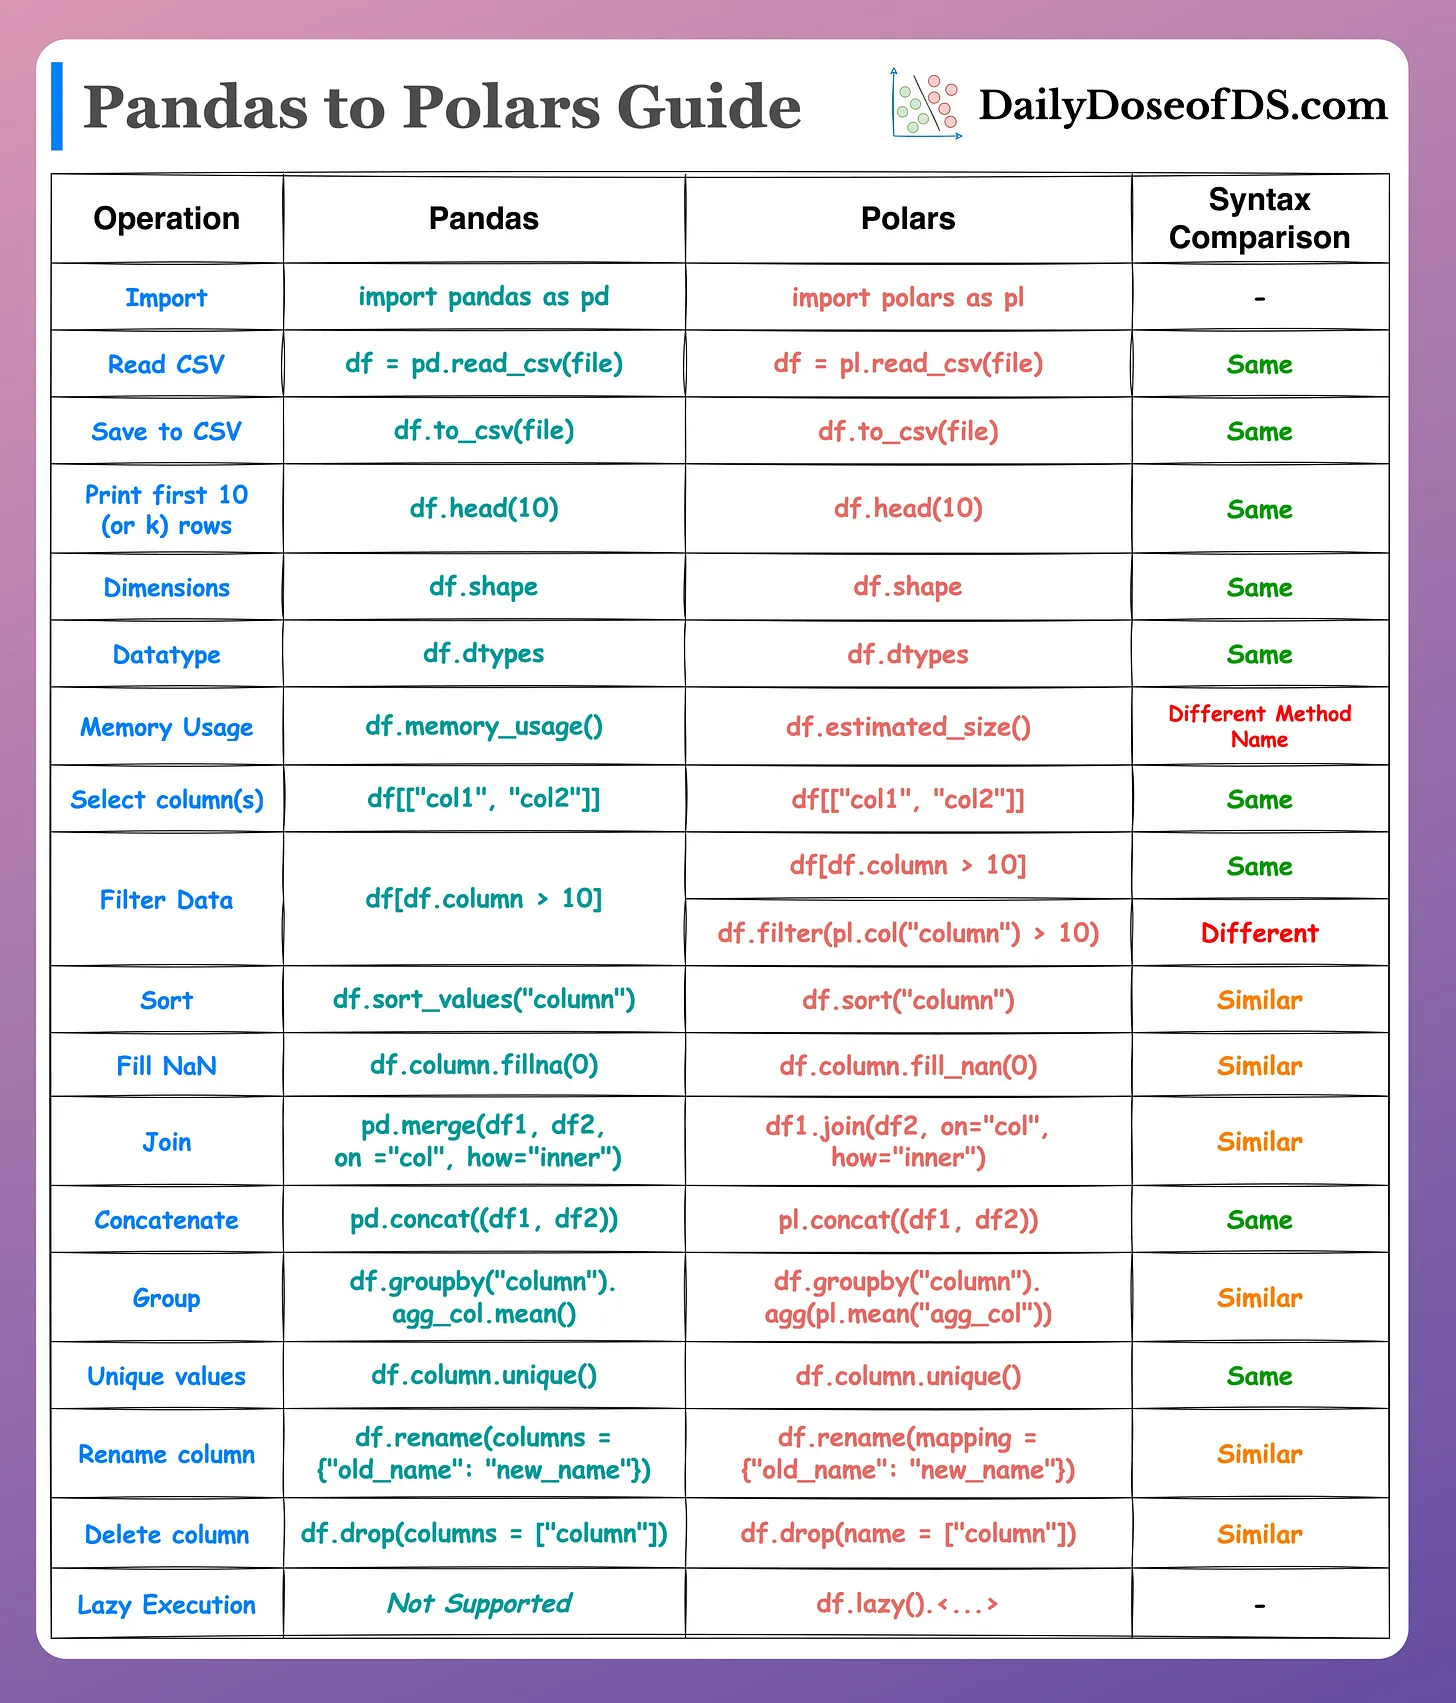

[Битва медведей: Pandas против Polars](https://habr.com/ru/companies/spectr/articles/738766/)